# Joint distribution of two discrete RVs

Probabilities are organized in 2D arrays.

A joint distribution describes the simultaneous behavior of two or more random variables. It provides the probabilities associated with the different combinations of values that the variables can take.

For two random variables $X$ and $Y$, the joint distribution is typically denoted as $P(X=x, Y=y)$ or $P(X, Y)$.

Key concepts related to joint distributions:

1. **Joint Probability Mass Function (Joint PMF):**
   - In the case of discrete random variables, the joint distribution is described by the joint probability mass function (joint PMF), denoted as $P(X=x, Y=y)$.
   - It gives the probability of the specific combination of values for $X$ and $Y$.

2. **Joint Probability Density Function (Joint PDF):**
   - For continuous random variables, the joint distribution is described by the joint probability density function (joint PDF), denoted as $f(x, y)$.
   - It gives the density (likelihood) of the variables taking specific values within a given region.

3. **Marginal Distributions:**
   - The marginal distribution of a single variable from the joint distribution is obtained by summing (or integrating) over all possible values of the other variable(s).
   - For example, the marginal distribution of $X$ is obtained by summing or integrating $P(X=x, Y=y)$ or $f(x, y)$ over all possible values of $Y$.


Understanding joint distributions is crucial for modeling and analyzing systems involving multiple variables, as it provides insights into how the variables interact and co-vary. It forms the foundation for various statistical methods, including regression analysis, multivariate analysis, and Bayesian statistics.

In [ ]:
import numpy as np

In [ ]:
Pxy = np.array([[1/12, 1/6,  1/18],
                [1/9 , 1/12, 1/9],
                [5/36, 1/12, 1/6]])
Pxy

array([[0.08333333, 0.16666667, 0.125     ],
       [0.11111111, 0.08333333, 0.11111111],
       [0.13888889, 0.08333333, 0.16666667]])

In [ ]:
Pxy.sum()

np.float64(1.0694444444444444)

In [ ]:
Px = Pxy.sum(axis=1) # marginal distribution of X
print('Marginal distribution of X:', Px)

Marginal distribution of X: [0.375      0.30555556 0.38888889]


In [ ]:
Py = Pxy.sum(axis=0) # marginal distribution of Y
print('Marginal distribution of Y:', Py)

Marginal distribution of Y: [0.33333333 0.33333333 0.40277778]


In [ ]:
# Now that we know Px and Py, we need to see if they are independent, to test for independence
# By multiplying Px1 by Py1 and seeing if the product is equal to x1y1 (1/12)
# It must apply to all products, enough that one is not the same, and we can say that they are not independent
# If two random variables are independent, the knowledge of the value of one variable provides no information about the value of the other variable.

In [ ]:
# Product of Px and Py
product = np.outer(Px, Py)
product

array([[0.125     , 0.125     , 0.15104167],
       [0.10185185, 0.10185185, 0.12307099],
       [0.12962963, 0.12962963, 0.1566358 ]])

In [ ]:
np.array_equal(product, Pxy)

False

In [ ]:
for i in range(Pxy.shape[0]):
  for j in range(Pxy.shape[1]):
    if Pxy[i,j] == Px[i] * Py[j]:
      print(Px[i] * Py[j])
print('end')

end


In [ ]:
Pxy = np.array([[5/24, 1/12, 1/6],
                [0,    7/24, 0]])
Pxy

array([[0.20833333, 0.08333333, 0.16666667],
       [0.        , 0.29166667, 0.        ]])

In [ ]:
x = 1 - np.sum(Pxy)
x

np.float64(0.25)

In [ ]:
Pxy = np.array([[5/24, 1/12, 1/6],
                [x,    7/24,  0]])
Pxy

array([[0.20833333, 0.08333333, 0.16666667],
       [0.25      , 0.29166667, 0.        ]])

In [ ]:
Px = Pxy.sum(axis=1) # marginal distribution of X
print('Marginal distribution of X:', Px)
Py = Pxy.sum(axis=0) # marginal distribution of Y
print('Marginal distribution of Y:', Py)

Marginal distribution of X: [0.45833333 0.54166667]
Marginal distribution of Y: [0.45833333 0.375      0.16666667]


In [ ]:
product = np.outer(Px, Py)
product

array([[0.21006944, 0.171875  , 0.07638889],
       [0.24826389, 0.203125  , 0.09027778]])

In [ ]:
for i in range(Pxy.shape[0]):
  for j in range(Pxy.shape[1]):
    if Pxy[i,j] != Px[i] * Py[j]:
      print(Px[i] * Py[j])

0.21006944444444448
0.171875
0.0763888888888889
0.24826388888888895
0.20312500000000003
0.09027777777777779


In [ ]:
import numpy as np
# Are these legitimate distributions?
PP=np.array([[4, 2, 2],
             [1, 1, 2]])  # By changing this, we change the (in)dependence of the random variables

In [ ]:
# How will we get a legitimate distribution?
# Let's divide each element by the sum
P=PP/PP.sum()
P

array([[0.33333333, 0.16666667, 0.16666667],
       [0.08333333, 0.08333333, 0.16666667]])

In [ ]:
# Values taken by random variables:
y=np.array([1,2,6])
x=np.array([-1,1])

In [ ]:
# Calculation of marginal distribution (distribution of only one separate random variable)
Px=P.sum(axis=1)
Py=P.sum(axis=0)
Px,Py

(array([0.66666667, 0.33333333]), array([0.41666667, 0.25      , 0.33333333]))

In [ ]:
for i in range(len(Px)):
  for j in range(len(Py)):
    if Px[i] * Py[j] != P[i,j]:
      print("Px[%d]*Py[%d] != P[%d,%d] : %5.3f*%5.3f = %5.3f != %5.3f"%(i,j,j,i,Px[i],Py[j],Px[i]*Py[j],P[i,j]))
      print((Px[i] * Py[j]), (P[i,j]), 'difference: ', (Px[i] * Py[j]) - (P[i,j]))

Px[0]*Py[0] != P[0,0] : 0.667*0.417 = 0.278 != 0.333
0.27777777777777773 0.3333333333333333 difference:  -0.05555555555555558
Px[0]*Py[2] != P[2,0] : 0.667*0.333 = 0.222 != 0.167
0.2222222222222222 0.16666666666666666 difference:  0.05555555555555555
Px[1]*Py[0] != P[0,1] : 0.333*0.417 = 0.139 != 0.083
0.13888888888888887 0.08333333333333333 difference:  0.05555555555555554
Px[1]*Py[2] != P[2,1] : 0.333*0.333 = 0.111 != 0.167
0.1111111111111111 0.16666666666666666 difference:  -0.05555555555555555


In [ ]:
# in one line
np.outer(Px,Py) - P

array([[-0.05555556,  0.        ,  0.05555556],
       [ 0.05555556,  0.        , -0.05555556]])

In [ ]:
# what should we do for them to become independent?
# we have to maintain that relationship

PP=np.array([[4, 2, 8],
             [2, 1, 4]])

P=PP/PP.sum()
P

array([[0.19047619, 0.0952381 , 0.38095238],
       [0.0952381 , 0.04761905, 0.19047619]])

In [ ]:
Px=P.sum(axis=1)
Py=P.sum(axis=0)
Px,Py

(array([0.66666667, 0.33333333]), array([0.28571429, 0.14285714, 0.57142857]))

In [ ]:
np.outer(Px,Py) - P

array([[0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
np.array_equal(np.outer(Px,Py), P)

True

#### Exercise

Joint PMF of a random pair $(X,Y)$ is given as follows:


| X/Y  |   1   |  -2   |  -3  |
| ---- | ----- | ----- | ----- |
| -5   | 1/12  | 1/4   | 1/8   |
| 5    | 1/6   | 1/12  | 0     |
| 10    | 0     | 1/15  | ?     |

Find:

a)  element that is missing

b)  $P(X>Y)$

c)  $P(Y<1)$.

d)  Are $X$ and $Y$ independent RVs?

In [ ]:
#a)
Pxy = np.array([
    [1/12, 1/4,  1/8],
    [1/6,  1/12, 0],
    [0,    1/15, 0]])
element=1-Pxy.sum()
element

0.22499999999999998

In [ ]:
Pxy[2,2]=element
Pxy.sum()

1.0

In [ ]:
Pxy

array([[0.08333333, 0.25      , 0.125     ],
       [0.16666667, 0.08333333, 0.        ],
       [0.        , 0.06666667, 0.225     ]])

In [ ]:
np.max(Pxy)

0.25

In [ ]:
x = np.array([-5,5,10])
y = np.array([1,-2,-3])

In [ ]:
Pxy

array([[0.08333333, 0.25      , 0.125     ],
       [0.16666667, 0.08333333, 0.        ],
       [0.        , 0.06666667, 0.225     ]])

In [ ]:
P1=0
for i in range(3):
    for j in range(3):
        if x[i]>y[j]:
          print(x[i],y[j])
          P1 += Pxy[i,j]

P1

5 1
5 -2
5 -3
10 1
10 -2
10 -3


0.5416666666666666

In [ ]:
sum(sum(Pxy[1:]))

0.5416666666666666

In [ ]:
P2=0
for i in range(3):
    for j in range(3):
        if y[j]<1:
          P2+=Pxy[i,j]

P2

0.75

In [ ]:
P2 = np.array([p for p,j in zip(Py,y) if j<1]).sum()
P2

0.75

In [ ]:
Pxy[:,1:].sum()

0.75

In [ ]:
Px=Pxy.sum(axis=1)
Py=Pxy.sum(axis=0)
Px, Py

(array([0.45833333, 0.25      , 0.29166667]), array([0.25, 0.4 , 0.35]))

In [ ]:
np.outer(Px,Py) - Pxy

array([[ 0.03125   , -0.06666667,  0.03541667],
       [-0.10416667,  0.01666667,  0.0875    ],
       [ 0.07291667,  0.05      , -0.12291667]])

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

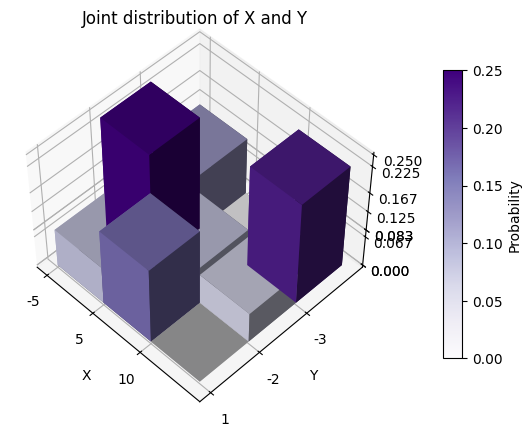

In [ ]:
PP = Pxy
X, Y = np.meshgrid(np.arange(len(x)), np.arange(len(y)))
fig = plt.figure()
ax = plt.axes(projection = '3d')
xpos = X.flatten()
ypos = Y.flatten()
zpos = np.zeros(len(PP.T.flatten()))
dx = 1
dy = 1
dz = PP.T.flatten()


cmap = cm.Purples
max_height = np.max(dz)
min_height = np.min(dz)

rgba = [cmap((k-min_height)/max_height) for k in dz]

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba)

ax.set_xticks(np.arange(len(x)))
ax.set_yticks(np.arange(len(y)))
ax.set_xticklabels(x)
ax.set_yticklabels(y)
ax.set_zticks(np.round(dz,3))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Joint distribution of X and Y')
ax.view_init(50, -45)

sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([dz])
fig.colorbar(sm, ax=ax, cax= fig.add_axes([0.9, 0.2, 0.03, 0.6]), label='Probability')
plt.show()

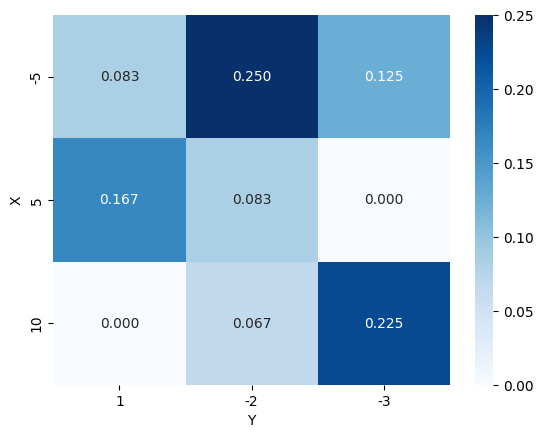

array([[0.08333333, 0.25      , 0.125     ],
       [0.16666667, 0.08333333, 0.        ],
       [0.        , 0.06666667, 0.225     ]])

In [ ]:
import seaborn as sns
sns.heatmap(PP, xticklabels=y, yticklabels=x, annot=True, cmap="Blues", fmt=".3f")
plt.xlabel('Y')
plt.ylabel('X')
plt.show()
Pxy